In [1]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 3500 #17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
frameNxtBuff = [] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    frameNxtBuff.append(pixelValues[-20]) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "Main Buffers Ahead: ", pixelValues[-28], "\t",
          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  92 	 Main Timestamp:  92 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1 	 Interrupt Timestamp:  142 	 Main Timestamp:  143 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2 	 Interrupt Timestamp:  193 	 Main Timestamp:  193 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3 	 Interrupt Timestamp:  243 	 Main Timestamp:  243 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4 	 Interrupt Timestamp:  294 	 Main Timestamp:  294 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5 	 Interrupt Timestamp:  344 	 Main Timestamp:  344 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6 	 Interrupt Timestamp:  395 	 Main Timestamp:  395 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7 	 Interrupt Timestamp:  445 	 Main Timestamp:  445 	 Main Buffers Ahead:  1 	 Interrupt Buffers 

Frame Number:  72 	 Interrupt Timestamp:  3724 	 Main Timestamp:  3724 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  73 	 Interrupt Timestamp:  3774 	 Main Timestamp:  3774 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  74 	 Interrupt Timestamp:  3825 	 Main Timestamp:  3825 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  75 	 Interrupt Timestamp:  3875 	 Main Timestamp:  3875 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  76 	 Interrupt Timestamp:  3926 	 Main Timestamp:  3926 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  77 	 Interrupt Timestamp:  3976 	 Main Timestamp:  3976 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  78 	 Interrupt Timestamp:  4026 	 Main Timestamp:  4026 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  79 	 Interrupt Timestamp:  4077 	 Main Timestamp:  4077 	 Main Buffers Ahea

Frame Number:  137 	 Interrupt Timestamp:  7002 	 Main Timestamp:  7003 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  138 	 Interrupt Timestamp:  7053 	 Main Timestamp:  7053 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  139 	 Interrupt Timestamp:  7103 	 Main Timestamp:  7103 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  140 	 Interrupt Timestamp:  7154 	 Main Timestamp:  7154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  141 	 Interrupt Timestamp:  7204 	 Main Timestamp:  7204 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  142 	 Interrupt Timestamp:  7255 	 Main Timestamp:  7255 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  143 	 Interrupt Timestamp:  7305 	 Main Timestamp:  7305 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  144 	 Interrupt Timestamp:  7356 	 Main Timestamp:  7356 	 Main Buff

Frame Number:  201 	 Interrupt Timestamp:  10231 	 Main Timestamp:  10231 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  202 	 Interrupt Timestamp:  10281 	 Main Timestamp:  10281 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  203 	 Interrupt Timestamp:  10332 	 Main Timestamp:  10332 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  204 	 Interrupt Timestamp:  10382 	 Main Timestamp:  10382 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  205 	 Interrupt Timestamp:  10432 	 Main Timestamp:  10433 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  206 	 Interrupt Timestamp:  10483 	 Main Timestamp:  10483 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  207 	 Interrupt Timestamp:  10533 	 Main Timestamp:  10533 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  208 	 Interrupt Timestamp:  10584 	 Main Timestamp:  1

Frame Number:  272 	 Interrupt Timestamp:  13812 	 Main Timestamp:  13812 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  273 	 Interrupt Timestamp:  13863 	 Main Timestamp:  13863 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  274 	 Interrupt Timestamp:  13913 	 Main Timestamp:  13913 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  275 	 Interrupt Timestamp:  13963 	 Main Timestamp:  13963 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  276 	 Interrupt Timestamp:  14014 	 Main Timestamp:  14014 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  277 	 Interrupt Timestamp:  14064 	 Main Timestamp:  14064 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  278 	 Interrupt Timestamp:  14115 	 Main Timestamp:  14115 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  279 	 Interrupt Timestamp:  14165 	 Main Timestamp:  1

Frame Number:  339 	 Interrupt Timestamp:  17192 	 Main Timestamp:  17192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  340 	 Interrupt Timestamp:  17242 	 Main Timestamp:  17242 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  341 	 Interrupt Timestamp:  17293 	 Main Timestamp:  17293 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  342 	 Interrupt Timestamp:  17343 	 Main Timestamp:  17343 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  343 	 Interrupt Timestamp:  17393 	 Main Timestamp:  17393 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  344 	 Interrupt Timestamp:  17444 	 Main Timestamp:  17444 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  345 	 Interrupt Timestamp:  17494 	 Main Timestamp:  17494 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  346 	 Interrupt Timestamp:  17545 	 Main Timestamp:  1

Frame Number:  405 	 Interrupt Timestamp:  20521 	 Main Timestamp:  20521 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  406 	 Interrupt Timestamp:  20571 	 Main Timestamp:  20571 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  407 	 Interrupt Timestamp:  20622 	 Main Timestamp:  20622 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  408 	 Interrupt Timestamp:  20672 	 Main Timestamp:  20672 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  409 	 Interrupt Timestamp:  20723 	 Main Timestamp:  20723 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  410 	 Interrupt Timestamp:  20773 	 Main Timestamp:  20773 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  411 	 Interrupt Timestamp:  20823 	 Main Timestamp:  20823 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  412 	 Interrupt Timestamp:  20874 	 Main Timestamp:  2

Frame Number:  474 	 Interrupt Timestamp:  24001 	 Main Timestamp:  24001 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  475 	 Interrupt Timestamp:  24052 	 Main Timestamp:  24052 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  476 	 Interrupt Timestamp:  24102 	 Main Timestamp:  24102 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  477 	 Interrupt Timestamp:  24153 	 Main Timestamp:  24153 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  478 	 Interrupt Timestamp:  24203 	 Main Timestamp:  24203 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  479 	 Interrupt Timestamp:  24253 	 Main Timestamp:  24253 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  480 	 Interrupt Timestamp:  24304 	 Main Timestamp:  24304 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  481 	 Interrupt Timestamp:  24354 	 Main Timestamp:  2

Frame Number:  540 	 Interrupt Timestamp:  27330 	 Main Timestamp:  27330 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  541 	 Interrupt Timestamp:  27381 	 Main Timestamp:  27381 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  542 	 Interrupt Timestamp:  27431 	 Main Timestamp:  27431 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  543 	 Interrupt Timestamp:  27482 	 Main Timestamp:  27482 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  544 	 Interrupt Timestamp:  27532 	 Main Timestamp:  27532 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  545 	 Interrupt Timestamp:  27583 	 Main Timestamp:  27583 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  546 	 Interrupt Timestamp:  27633 	 Main Timestamp:  27633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  547 	 Interrupt Timestamp:  27683 	 Main Timestamp:  2

Frame Number:  607 	 Interrupt Timestamp:  30710 	 Main Timestamp:  30710 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  608 	 Interrupt Timestamp:  30760 	 Main Timestamp:  30760 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  609 	 Interrupt Timestamp:  30811 	 Main Timestamp:  30811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  610 	 Interrupt Timestamp:  30861 	 Main Timestamp:  30861 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  611 	 Interrupt Timestamp:  30912 	 Main Timestamp:  30912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  612 	 Interrupt Timestamp:  30962 	 Main Timestamp:  30962 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  613 	 Interrupt Timestamp:  31013 	 Main Timestamp:  31013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  614 	 Interrupt Timestamp:  31063 	 Main Timestamp:  3

Frame Number:  669 	 Interrupt Timestamp:  33837 	 Main Timestamp:  33837 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  670 	 Interrupt Timestamp:  33888 	 Main Timestamp:  33888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  671 	 Interrupt Timestamp:  33938 	 Main Timestamp:  33938 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  672 	 Interrupt Timestamp:  33989 	 Main Timestamp:  33989 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  673 	 Interrupt Timestamp:  34039 	 Main Timestamp:  34039 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  674 	 Interrupt Timestamp:  34089 	 Main Timestamp:  34089 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  675 	 Interrupt Timestamp:  34140 	 Main Timestamp:  34140 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  676 	 Interrupt Timestamp:  34190 	 Main Timestamp:  3

Frame Number:  735 	 Interrupt Timestamp:  37166 	 Main Timestamp:  37166 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  736 	 Interrupt Timestamp:  37217 	 Main Timestamp:  37217 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  737 	 Interrupt Timestamp:  37267 	 Main Timestamp:  37267 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  738 	 Interrupt Timestamp:  37318 	 Main Timestamp:  37318 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  739 	 Interrupt Timestamp:  37368 	 Main Timestamp:  37368 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  740 	 Interrupt Timestamp:  37419 	 Main Timestamp:  37419 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  741 	 Interrupt Timestamp:  37469 	 Main Timestamp:  37469 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  742 	 Interrupt Timestamp:  37519 	 Main Timestamp:  3

Frame Number:  801 	 Interrupt Timestamp:  40496 	 Main Timestamp:  40496 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  802 	 Interrupt Timestamp:  40546 	 Main Timestamp:  40546 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  803 	 Interrupt Timestamp:  40596 	 Main Timestamp:  40596 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  804 	 Interrupt Timestamp:  40647 	 Main Timestamp:  40647 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  805 	 Interrupt Timestamp:  40697 	 Main Timestamp:  40697 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  806 	 Interrupt Timestamp:  40748 	 Main Timestamp:  40748 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  807 	 Interrupt Timestamp:  40798 	 Main Timestamp:  40798 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  808 	 Interrupt Timestamp:  40849 	 Main Timestamp:  4

Frame Number:  869 	 Interrupt Timestamp:  43926 	 Main Timestamp:  43926 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  870 	 Interrupt Timestamp:  43976 	 Main Timestamp:  43976 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  871 	 Interrupt Timestamp:  44026 	 Main Timestamp:  44026 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  872 	 Interrupt Timestamp:  44077 	 Main Timestamp:  44077 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  873 	 Interrupt Timestamp:  44127 	 Main Timestamp:  44127 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  874 	 Interrupt Timestamp:  44178 	 Main Timestamp:  44178 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  875 	 Interrupt Timestamp:  44228 	 Main Timestamp:  44228 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  876 	 Interrupt Timestamp:  44279 	 Main Timestamp:  4

Frame Number:  937 	 Interrupt Timestamp:  47356 	 Main Timestamp:  47356 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  938 	 Interrupt Timestamp:  47406 	 Main Timestamp:  47406 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  939 	 Interrupt Timestamp:  47456 	 Main Timestamp:  47456 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  940 	 Interrupt Timestamp:  47507 	 Main Timestamp:  47507 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  941 	 Interrupt Timestamp:  47557 	 Main Timestamp:  47557 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  942 	 Interrupt Timestamp:  47608 	 Main Timestamp:  47608 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  943 	 Interrupt Timestamp:  47658 	 Main Timestamp:  47658 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  944 	 Interrupt Timestamp:  47709 	 Main Timestamp:  4

Frame Number:  1001 	 Interrupt Timestamp:  50584 	 Main Timestamp:  50584 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1002 	 Interrupt Timestamp:  50634 	 Main Timestamp:  50634 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1003 	 Interrupt Timestamp:  50685 	 Main Timestamp:  50685 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1004 	 Interrupt Timestamp:  50735 	 Main Timestamp:  50735 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1005 	 Interrupt Timestamp:  50786 	 Main Timestamp:  50786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1006 	 Interrupt Timestamp:  50836 	 Main Timestamp:  50836 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1007 	 Interrupt Timestamp:  50886 	 Main Timestamp:  50886 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1008 	 Interrupt Timestamp:  50937 	 Main Times

Frame Number:  1064 	 Interrupt Timestamp:  53762 	 Main Timestamp:  53762 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1065 	 Interrupt Timestamp:  53812 	 Main Timestamp:  53812 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1066 	 Interrupt Timestamp:  53862 	 Main Timestamp:  53862 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1067 	 Interrupt Timestamp:  53913 	 Main Timestamp:  53913 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1068 	 Interrupt Timestamp:  53963 	 Main Timestamp:  53963 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1069 	 Interrupt Timestamp:  54014 	 Main Timestamp:  54014 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1070 	 Interrupt Timestamp:  54064 	 Main Timestamp:  54064 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1071 	 Interrupt Timestamp:  54115 	 Main Times

Frame Number:  1135 	 Interrupt Timestamp:  57343 	 Main Timestamp:  57343 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1136 	 Interrupt Timestamp:  57393 	 Main Timestamp:  57393 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1137 	 Interrupt Timestamp:  57444 	 Main Timestamp:  57444 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1138 	 Interrupt Timestamp:  57494 	 Main Timestamp:  57494 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1139 	 Interrupt Timestamp:  57545 	 Main Timestamp:  57545 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1140 	 Interrupt Timestamp:  57595 	 Main Timestamp:  57595 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1141 	 Interrupt Timestamp:  57646 	 Main Timestamp:  57646 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1142 	 Interrupt Timestamp:  57696 	 Main Times

Frame Number:  1204 	 Interrupt Timestamp:  60823 	 Main Timestamp:  60823 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1205 	 Interrupt Timestamp:  60874 	 Main Timestamp:  60874 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1206 	 Interrupt Timestamp:  60924 	 Main Timestamp:  60924 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1207 	 Interrupt Timestamp:  60975 	 Main Timestamp:  60975 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1208 	 Interrupt Timestamp:  61025 	 Main Timestamp:  61025 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1209 	 Interrupt Timestamp:  61076 	 Main Timestamp:  61076 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1210 	 Interrupt Timestamp:  61126 	 Main Timestamp:  61126 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1211 	 Interrupt Timestamp:  61176 	 Main Times

Frame Number:  1270 	 Interrupt Timestamp:  64152 	 Main Timestamp:  64153 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1271 	 Interrupt Timestamp:  64203 	 Main Timestamp:  64203 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1272 	 Interrupt Timestamp:  64253 	 Main Timestamp:  64253 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1273 	 Interrupt Timestamp:  64304 	 Main Timestamp:  64304 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1274 	 Interrupt Timestamp:  64354 	 Main Timestamp:  64354 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1275 	 Interrupt Timestamp:  64405 	 Main Timestamp:  64405 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1276 	 Interrupt Timestamp:  64455 	 Main Timestamp:  64455 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1277 	 Interrupt Timestamp:  64506 	 Main Times

Frame Number:  1333 	 Interrupt Timestamp:  67330 	 Main Timestamp:  67330 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1334 	 Interrupt Timestamp:  67381 	 Main Timestamp:  67381 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1335 	 Interrupt Timestamp:  67431 	 Main Timestamp:  67431 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1336 	 Interrupt Timestamp:  67482 	 Main Timestamp:  67482 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1337 	 Interrupt Timestamp:  67532 	 Main Timestamp:  67532 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1338 	 Interrupt Timestamp:  67582 	 Main Timestamp:  67583 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1339 	 Interrupt Timestamp:  67633 	 Main Timestamp:  67633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1340 	 Interrupt Timestamp:  67683 	 Main Times

Frame Number:  1402 	 Interrupt Timestamp:  70811 	 Main Timestamp:  70811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1403 	 Interrupt Timestamp:  70861 	 Main Timestamp:  70861 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1404 	 Interrupt Timestamp:  70912 	 Main Timestamp:  70912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1405 	 Interrupt Timestamp:  70962 	 Main Timestamp:  70962 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1406 	 Interrupt Timestamp:  71013 	 Main Timestamp:  71013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1407 	 Interrupt Timestamp:  71063 	 Main Timestamp:  71063 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1408 	 Interrupt Timestamp:  71113 	 Main Timestamp:  71113 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1409 	 Interrupt Timestamp:  71164 	 Main Times

Frame Number:  1469 	 Interrupt Timestamp:  74190 	 Main Timestamp:  74190 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1470 	 Interrupt Timestamp:  74241 	 Main Timestamp:  74241 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1471 	 Interrupt Timestamp:  74291 	 Main Timestamp:  74291 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1472 	 Interrupt Timestamp:  74342 	 Main Timestamp:  74342 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1473 	 Interrupt Timestamp:  74392 	 Main Timestamp:  74392 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1474 	 Interrupt Timestamp:  74443 	 Main Timestamp:  74443 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1475 	 Interrupt Timestamp:  74493 	 Main Timestamp:  74493 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1476 	 Interrupt Timestamp:  74543 	 Main Times

Frame Number:  1535 	 Interrupt Timestamp:  77519 	 Main Timestamp:  77519 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1536 	 Interrupt Timestamp:  77570 	 Main Timestamp:  77570 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1537 	 Interrupt Timestamp:  77620 	 Main Timestamp:  77620 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1538 	 Interrupt Timestamp:  77671 	 Main Timestamp:  77671 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1539 	 Interrupt Timestamp:  77721 	 Main Timestamp:  77721 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1540 	 Interrupt Timestamp:  77772 	 Main Timestamp:  77772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1541 	 Interrupt Timestamp:  77822 	 Main Timestamp:  77822 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1542 	 Interrupt Timestamp:  77873 	 Main Times

Frame Number:  1601 	 Interrupt Timestamp:  80849 	 Main Timestamp:  80849 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1602 	 Interrupt Timestamp:  80899 	 Main Timestamp:  80899 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1603 	 Interrupt Timestamp:  80949 	 Main Timestamp:  80949 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1604 	 Interrupt Timestamp:  81000 	 Main Timestamp:  81000 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1605 	 Interrupt Timestamp:  81050 	 Main Timestamp:  81050 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1606 	 Interrupt Timestamp:  81101 	 Main Timestamp:  81101 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1607 	 Interrupt Timestamp:  81151 	 Main Timestamp:  81151 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1608 	 Interrupt Timestamp:  81202 	 Main Times

Frame Number:  1670 	 Interrupt Timestamp:  84329 	 Main Timestamp:  84329 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1671 	 Interrupt Timestamp:  84379 	 Main Timestamp:  84379 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1672 	 Interrupt Timestamp:  84430 	 Main Timestamp:  84430 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1673 	 Interrupt Timestamp:  84480 	 Main Timestamp:  84480 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1674 	 Interrupt Timestamp:  84531 	 Main Timestamp:  84531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1675 	 Interrupt Timestamp:  84581 	 Main Timestamp:  84581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1676 	 Interrupt Timestamp:  84632 	 Main Timestamp:  84632 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1677 	 Interrupt Timestamp:  84682 	 Main Times

Frame Number:  1742 	 Interrupt Timestamp:  87961 	 Main Timestamp:  87961 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1743 	 Interrupt Timestamp:  88011 	 Main Timestamp:  88011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1744 	 Interrupt Timestamp:  88062 	 Main Timestamp:  88062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1745 	 Interrupt Timestamp:  88112 	 Main Timestamp:  88112 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1746 	 Interrupt Timestamp:  88163 	 Main Timestamp:  88163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1747 	 Interrupt Timestamp:  88213 	 Main Timestamp:  88213 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1748 	 Interrupt Timestamp:  88263 	 Main Timestamp:  88263 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1749 	 Interrupt Timestamp:  88314 	 Main Times

Frame Number:  1804 	 Interrupt Timestamp:  91088 	 Main Timestamp:  91088 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1805 	 Interrupt Timestamp:  91139 	 Main Timestamp:  91139 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1806 	 Interrupt Timestamp:  91189 	 Main Timestamp:  91189 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1807 	 Interrupt Timestamp:  91239 	 Main Timestamp:  91239 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1808 	 Interrupt Timestamp:  91290 	 Main Timestamp:  91290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1809 	 Interrupt Timestamp:  91340 	 Main Timestamp:  91340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1810 	 Interrupt Timestamp:  91391 	 Main Timestamp:  91391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1811 	 Interrupt Timestamp:  91441 	 Main Times

Frame Number:  1872 	 Interrupt Timestamp:  94518 	 Main Timestamp:  94518 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1873 	 Interrupt Timestamp:  94569 	 Main Timestamp:  94569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1874 	 Interrupt Timestamp:  94619 	 Main Timestamp:  94619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1875 	 Interrupt Timestamp:  94669 	 Main Timestamp:  94670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1876 	 Interrupt Timestamp:  94720 	 Main Timestamp:  94720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1877 	 Interrupt Timestamp:  94770 	 Main Timestamp:  94770 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1878 	 Interrupt Timestamp:  94821 	 Main Timestamp:  94821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1879 	 Interrupt Timestamp:  94871 	 Main Times

Frame Number:  1938 	 Interrupt Timestamp:  97847 	 Main Timestamp:  97847 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1939 	 Interrupt Timestamp:  97898 	 Main Timestamp:  97898 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1940 	 Interrupt Timestamp:  97948 	 Main Timestamp:  97948 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1941 	 Interrupt Timestamp:  97999 	 Main Timestamp:  97999 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1942 	 Interrupt Timestamp:  98049 	 Main Timestamp:  98049 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1943 	 Interrupt Timestamp:  98099 	 Main Timestamp:  98100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1944 	 Interrupt Timestamp:  98150 	 Main Timestamp:  98150 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1945 	 Interrupt Timestamp:  98200 	 Main Times

Frame Number:  2000 	 Interrupt Timestamp:  100975 	 Main Timestamp:  100975 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2001 	 Interrupt Timestamp:  101025 	 Main Timestamp:  101025 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2002 	 Interrupt Timestamp:  101076 	 Main Timestamp:  101076 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2003 	 Interrupt Timestamp:  101126 	 Main Timestamp:  101126 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2004 	 Interrupt Timestamp:  101176 	 Main Timestamp:  101176 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2005 	 Interrupt Timestamp:  101227 	 Main Timestamp:  101227 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2006 	 Interrupt Timestamp:  101277 	 Main Timestamp:  101277 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2007 	 Interrupt Timestamp:  1013

Frame Number:  2068 	 Interrupt Timestamp:  104405 	 Main Timestamp:  104405 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2069 	 Interrupt Timestamp:  104455 	 Main Timestamp:  104455 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2070 	 Interrupt Timestamp:  104506 	 Main Timestamp:  104506 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2071 	 Interrupt Timestamp:  104556 	 Main Timestamp:  104556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2072 	 Interrupt Timestamp:  104606 	 Main Timestamp:  104606 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2073 	 Interrupt Timestamp:  104657 	 Main Timestamp:  104657 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2074 	 Interrupt Timestamp:  104707 	 Main Timestamp:  104707 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2075 	 Interrupt Timestamp:  1047

Frame Number:  2129 	 Interrupt Timestamp:  107482 	 Main Timestamp:  107482 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2130 	 Interrupt Timestamp:  107532 	 Main Timestamp:  107532 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2131 	 Interrupt Timestamp:  107582 	 Main Timestamp:  107582 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2132 	 Interrupt Timestamp:  107633 	 Main Timestamp:  107633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2133 	 Interrupt Timestamp:  107683 	 Main Timestamp:  107683 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2134 	 Interrupt Timestamp:  107734 	 Main Timestamp:  107734 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2135 	 Interrupt Timestamp:  107784 	 Main Timestamp:  107784 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2136 	 Interrupt Timestamp:  1078

Frame Number:  2193 	 Interrupt Timestamp:  110710 	 Main Timestamp:  110710 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2194 	 Interrupt Timestamp:  110760 	 Main Timestamp:  110760 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2195 	 Interrupt Timestamp:  110811 	 Main Timestamp:  110811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2196 	 Interrupt Timestamp:  110861 	 Main Timestamp:  110861 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2197 	 Interrupt Timestamp:  110912 	 Main Timestamp:  110912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2198 	 Interrupt Timestamp:  110962 	 Main Timestamp:  110962 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2199 	 Interrupt Timestamp:  111012 	 Main Timestamp:  111012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2200 	 Interrupt Timestamp:  1110

Frame Number:  2262 	 Interrupt Timestamp:  114190 	 Main Timestamp:  114190 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2263 	 Interrupt Timestamp:  114241 	 Main Timestamp:  114241 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2264 	 Interrupt Timestamp:  114291 	 Main Timestamp:  114291 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2265 	 Interrupt Timestamp:  114342 	 Main Timestamp:  114342 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2266 	 Interrupt Timestamp:  114392 	 Main Timestamp:  114392 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2267 	 Interrupt Timestamp:  114442 	 Main Timestamp:  114443 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2268 	 Interrupt Timestamp:  114493 	 Main Timestamp:  114493 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2269 	 Interrupt Timestamp:  1145

Frame Number:  2325 	 Interrupt Timestamp:  117368 	 Main Timestamp:  117368 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2326 	 Interrupt Timestamp:  117419 	 Main Timestamp:  117419 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2327 	 Interrupt Timestamp:  117469 	 Main Timestamp:  117469 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2328 	 Interrupt Timestamp:  117519 	 Main Timestamp:  117519 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2329 	 Interrupt Timestamp:  117570 	 Main Timestamp:  117570 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2330 	 Interrupt Timestamp:  117620 	 Main Timestamp:  117620 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2331 	 Interrupt Timestamp:  117671 	 Main Timestamp:  117671 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2332 	 Interrupt Timestamp:  1177

Frame Number:  2386 	 Interrupt Timestamp:  120445 	 Main Timestamp:  120445 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2387 	 Interrupt Timestamp:  120495 	 Main Timestamp:  120495 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2388 	 Interrupt Timestamp:  120546 	 Main Timestamp:  120546 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2389 	 Interrupt Timestamp:  120596 	 Main Timestamp:  120596 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2390 	 Interrupt Timestamp:  120647 	 Main Timestamp:  120647 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2391 	 Interrupt Timestamp:  120697 	 Main Timestamp:  120697 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2392 	 Interrupt Timestamp:  120748 	 Main Timestamp:  120748 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2393 	 Interrupt Timestamp:  1207

Frame Number:  2450 	 Interrupt Timestamp:  123673 	 Main Timestamp:  123673 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2451 	 Interrupt Timestamp:  123724 	 Main Timestamp:  123724 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2452 	 Interrupt Timestamp:  123774 	 Main Timestamp:  123774 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2453 	 Interrupt Timestamp:  123825 	 Main Timestamp:  123825 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2454 	 Interrupt Timestamp:  123875 	 Main Timestamp:  123875 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2455 	 Interrupt Timestamp:  123925 	 Main Timestamp:  123925 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2456 	 Interrupt Timestamp:  123976 	 Main Timestamp:  123976 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2457 	 Interrupt Timestamp:  1240

Frame Number:  2513 	 Interrupt Timestamp:  126851 	 Main Timestamp:  126851 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2514 	 Interrupt Timestamp:  126901 	 Main Timestamp:  126902 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2515 	 Interrupt Timestamp:  126952 	 Main Timestamp:  126952 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2516 	 Interrupt Timestamp:  127002 	 Main Timestamp:  127002 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2517 	 Interrupt Timestamp:  127053 	 Main Timestamp:  127053 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2518 	 Interrupt Timestamp:  127103 	 Main Timestamp:  127103 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2519 	 Interrupt Timestamp:  127154 	 Main Timestamp:  127154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2520 	 Interrupt Timestamp:  1272

Frame Number:  2580 	 Interrupt Timestamp:  130231 	 Main Timestamp:  130231 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2581 	 Interrupt Timestamp:  130281 	 Main Timestamp:  130281 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2582 	 Interrupt Timestamp:  130332 	 Main Timestamp:  130332 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2583 	 Interrupt Timestamp:  130382 	 Main Timestamp:  130382 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2584 	 Interrupt Timestamp:  130432 	 Main Timestamp:  130432 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2585 	 Interrupt Timestamp:  130483 	 Main Timestamp:  130483 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2586 	 Interrupt Timestamp:  130533 	 Main Timestamp:  130533 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2587 	 Interrupt Timestamp:  1305

Frame Number:  2641 	 Interrupt Timestamp:  133308 	 Main Timestamp:  133308 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2642 	 Interrupt Timestamp:  133358 	 Main Timestamp:  133358 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2643 	 Interrupt Timestamp:  133408 	 Main Timestamp:  133408 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2644 	 Interrupt Timestamp:  133459 	 Main Timestamp:  133459 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2645 	 Interrupt Timestamp:  133509 	 Main Timestamp:  133509 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2646 	 Interrupt Timestamp:  133560 	 Main Timestamp:  133560 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2647 	 Interrupt Timestamp:  133610 	 Main Timestamp:  133610 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2648 	 Interrupt Timestamp:  1336

Frame Number:  2708 	 Interrupt Timestamp:  136687 	 Main Timestamp:  136687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2709 	 Interrupt Timestamp:  136738 	 Main Timestamp:  136738 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2710 	 Interrupt Timestamp:  136788 	 Main Timestamp:  136788 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2711 	 Interrupt Timestamp:  136838 	 Main Timestamp:  136838 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2712 	 Interrupt Timestamp:  136889 	 Main Timestamp:  136889 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2713 	 Interrupt Timestamp:  136939 	 Main Timestamp:  136939 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2714 	 Interrupt Timestamp:  136990 	 Main Timestamp:  136990 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2715 	 Interrupt Timestamp:  1370

Frame Number:  2775 	 Interrupt Timestamp:  140067 	 Main Timestamp:  140067 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2776 	 Interrupt Timestamp:  140117 	 Main Timestamp:  140117 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2777 	 Interrupt Timestamp:  140168 	 Main Timestamp:  140168 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2778 	 Interrupt Timestamp:  140218 	 Main Timestamp:  140218 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2779 	 Interrupt Timestamp:  140268 	 Main Timestamp:  140268 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2780 	 Interrupt Timestamp:  140319 	 Main Timestamp:  140319 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2781 	 Interrupt Timestamp:  140369 	 Main Timestamp:  140369 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2782 	 Interrupt Timestamp:  1404

Frame Number:  2839 	 Interrupt Timestamp:  143295 	 Main Timestamp:  143295 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2840 	 Interrupt Timestamp:  143345 	 Main Timestamp:  143345 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2841 	 Interrupt Timestamp:  143396 	 Main Timestamp:  143396 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2842 	 Interrupt Timestamp:  143446 	 Main Timestamp:  143446 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2843 	 Interrupt Timestamp:  143497 	 Main Timestamp:  143497 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2844 	 Interrupt Timestamp:  143547 	 Main Timestamp:  143547 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2845 	 Interrupt Timestamp:  143598 	 Main Timestamp:  143598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2846 	 Interrupt Timestamp:  1436

Frame Number:  2900 	 Interrupt Timestamp:  146372 	 Main Timestamp:  146372 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2901 	 Interrupt Timestamp:  146422 	 Main Timestamp:  146422 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2902 	 Interrupt Timestamp:  146473 	 Main Timestamp:  146473 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2903 	 Interrupt Timestamp:  146523 	 Main Timestamp:  146523 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2904 	 Interrupt Timestamp:  146574 	 Main Timestamp:  146574 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2905 	 Interrupt Timestamp:  146624 	 Main Timestamp:  146624 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2906 	 Interrupt Timestamp:  146674 	 Main Timestamp:  146675 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2907 	 Interrupt Timestamp:  1467

Frame Number:  2966 	 Interrupt Timestamp:  149701 	 Main Timestamp:  149701 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2967 	 Interrupt Timestamp:  149751 	 Main Timestamp:  149751 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2968 	 Interrupt Timestamp:  149802 	 Main Timestamp:  149802 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2969 	 Interrupt Timestamp:  149852 	 Main Timestamp:  149852 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2970 	 Interrupt Timestamp:  149903 	 Main Timestamp:  149903 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2971 	 Interrupt Timestamp:  149953 	 Main Timestamp:  149953 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2972 	 Interrupt Timestamp:  150004 	 Main Timestamp:  150004 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2973 	 Interrupt Timestamp:  1500

Frame Number:  3027 	 Interrupt Timestamp:  152778 	 Main Timestamp:  152778 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3028 	 Interrupt Timestamp:  152828 	 Main Timestamp:  152828 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3029 	 Interrupt Timestamp:  152879 	 Main Timestamp:  152879 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3030 	 Interrupt Timestamp:  152929 	 Main Timestamp:  152929 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3031 	 Interrupt Timestamp:  152980 	 Main Timestamp:  152980 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3032 	 Interrupt Timestamp:  153030 	 Main Timestamp:  153030 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3033 	 Interrupt Timestamp:  153081 	 Main Timestamp:  153081 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3034 	 Interrupt Timestamp:  1531

Frame Number:  3094 	 Interrupt Timestamp:  156157 	 Main Timestamp:  156157 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3095 	 Interrupt Timestamp:  156208 	 Main Timestamp:  156208 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3096 	 Interrupt Timestamp:  156258 	 Main Timestamp:  156258 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3097 	 Interrupt Timestamp:  156309 	 Main Timestamp:  156309 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3098 	 Interrupt Timestamp:  156359 	 Main Timestamp:  156359 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3099 	 Interrupt Timestamp:  156410 	 Main Timestamp:  156410 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3100 	 Interrupt Timestamp:  156460 	 Main Timestamp:  156460 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3101 	 Interrupt Timestamp:  1565

Frame Number:  3157 	 Interrupt Timestamp:  159335 	 Main Timestamp:  159335 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3158 	 Interrupt Timestamp:  159386 	 Main Timestamp:  159386 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3159 	 Interrupt Timestamp:  159436 	 Main Timestamp:  159436 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3160 	 Interrupt Timestamp:  159487 	 Main Timestamp:  159487 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3161 	 Interrupt Timestamp:  159537 	 Main Timestamp:  159537 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3162 	 Interrupt Timestamp:  159587 	 Main Timestamp:  159587 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3163 	 Interrupt Timestamp:  159638 	 Main Timestamp:  159638 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3164 	 Interrupt Timestamp:  1596

Frame Number:  3223 	 Interrupt Timestamp:  162664 	 Main Timestamp:  162664 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3224 	 Interrupt Timestamp:  162715 	 Main Timestamp:  162715 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3225 	 Interrupt Timestamp:  162765 	 Main Timestamp:  162765 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3226 	 Interrupt Timestamp:  162816 	 Main Timestamp:  162816 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3227 	 Interrupt Timestamp:  162866 	 Main Timestamp:  162866 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3228 	 Interrupt Timestamp:  162917 	 Main Timestamp:  162917 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3229 	 Interrupt Timestamp:  162967 	 Main Timestamp:  162967 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3230 	 Interrupt Timestamp:  1630

Frame Number:  3293 	 Interrupt Timestamp:  166195 	 Main Timestamp:  166195 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3294 	 Interrupt Timestamp:  166246 	 Main Timestamp:  166246 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3295 	 Interrupt Timestamp:  166296 	 Main Timestamp:  166296 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3296 	 Interrupt Timestamp:  166347 	 Main Timestamp:  166347 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3297 	 Interrupt Timestamp:  166397 	 Main Timestamp:  166397 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3298 	 Interrupt Timestamp:  166447 	 Main Timestamp:  166448 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3299 	 Interrupt Timestamp:  166498 	 Main Timestamp:  166498 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3300 	 Interrupt Timestamp:  1665

Frame Number:  3355 	 Interrupt Timestamp:  169323 	 Main Timestamp:  169323 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3356 	 Interrupt Timestamp:  169373 	 Main Timestamp:  169373 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3357 	 Interrupt Timestamp:  169424 	 Main Timestamp:  169424 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3358 	 Interrupt Timestamp:  169474 	 Main Timestamp:  169474 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3359 	 Interrupt Timestamp:  169524 	 Main Timestamp:  169524 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3360 	 Interrupt Timestamp:  169575 	 Main Timestamp:  169575 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3361 	 Interrupt Timestamp:  169625 	 Main Timestamp:  169625 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3362 	 Interrupt Timestamp:  1696

Frame Number:  3419 	 Interrupt Timestamp:  172551 	 Main Timestamp:  172551 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3420 	 Interrupt Timestamp:  172601 	 Main Timestamp:  172601 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3421 	 Interrupt Timestamp:  172652 	 Main Timestamp:  172652 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3422 	 Interrupt Timestamp:  172702 	 Main Timestamp:  172702 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3423 	 Interrupt Timestamp:  172753 	 Main Timestamp:  172753 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3424 	 Interrupt Timestamp:  172803 	 Main Timestamp:  172803 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3425 	 Interrupt Timestamp:  172854 	 Main Timestamp:  172854 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3426 	 Interrupt Timestamp:  1729

Frame Number:  3483 	 Interrupt Timestamp:  175779 	 Main Timestamp:  175779 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3484 	 Interrupt Timestamp:  175830 	 Main Timestamp:  175830 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3485 	 Interrupt Timestamp:  175880 	 Main Timestamp:  175880 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3486 	 Interrupt Timestamp:  175930 	 Main Timestamp:  175930 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3487 	 Interrupt Timestamp:  175981 	 Main Timestamp:  175981 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3488 	 Interrupt Timestamp:  176031 	 Main Timestamp:  176031 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3489 	 Interrupt Timestamp:  176082 	 Main Timestamp:  176082 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3490 	 Interrupt Timestamp:  1761

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

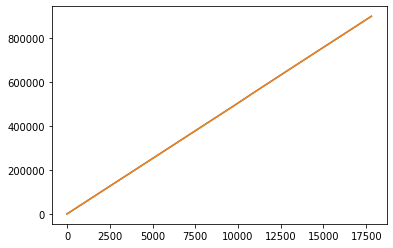

In [4]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [5]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

(array([1.0000e+00, 1.7742e+04, 1.0000e+00, 0.0000e+00, 3.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

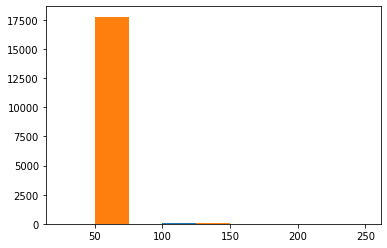

In [6]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


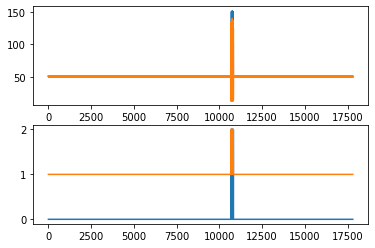

In [7]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


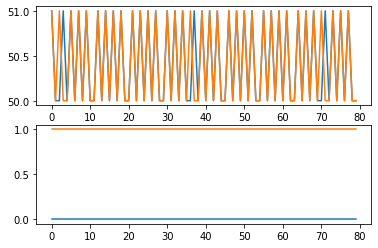

In [8]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

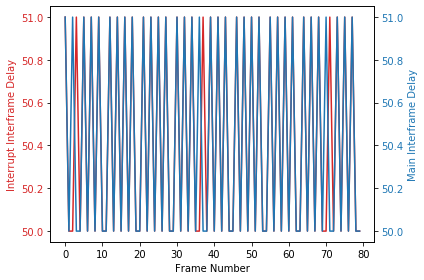

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50 51 50] 
 [101, 101, 101, 101, 101, 101, 151, 151, 151, 152]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

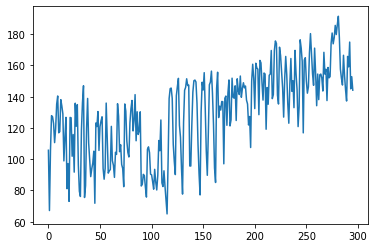

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

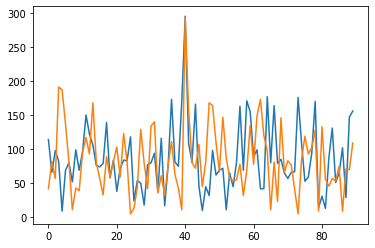

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

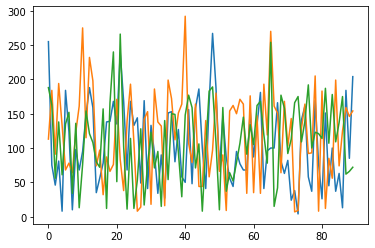

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()